# Car Price Predictions

In this project we will develop a web app that leverages machine learning to predict car prices.
The web app aims to empower consumers with data-driven insights, assisting them in making
informed decisions when buying or selling cars

## Instructions

This project consists of the following subsections:

1. Import the required libraries and read in the csv file

2. Exploratory Data Analysis 

3. Preprocessing/Cleaning Dataset 

4. Develop machine learning models using the following to fit the data.

        * Lasso Regression
        * Linear Regression
        * Principal Component Analysis
   

6. Develop web app using streamlit

7. Model Evaluation (within the ReadMe)

### Step 1: Import Libraries and Read In CSV file

In [1]:
# Import the required libraries
import pandas as pd
import hvplot.pandas
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import pickle


from sklearn import metrics
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from statsmodels.stats.outliers_influence import variance_inflation_factor 

import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the CSV file into a Pandas DataFrame
car_prices_df = pd.read_csv(Path("Resources/car_prices.csv"))
car_prices_df['state'] = car_prices_df['state'].str.upper()
# Review the DataFrame

car_prices_df.head()


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,CA,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,CA,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,CA,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,CA,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,CA,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [3]:
# Check for Null Values
car_prices_df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [4]:
car_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


### Step 2: Exploratory Data Analysis (EDA)

In [5]:
# Separate the data into target and features

# Separate the y variable, the target
y = car_prices_df["sellingprice"]

# Separate the X variable, the features
X = car_prices_df.drop(columns="sellingprice")

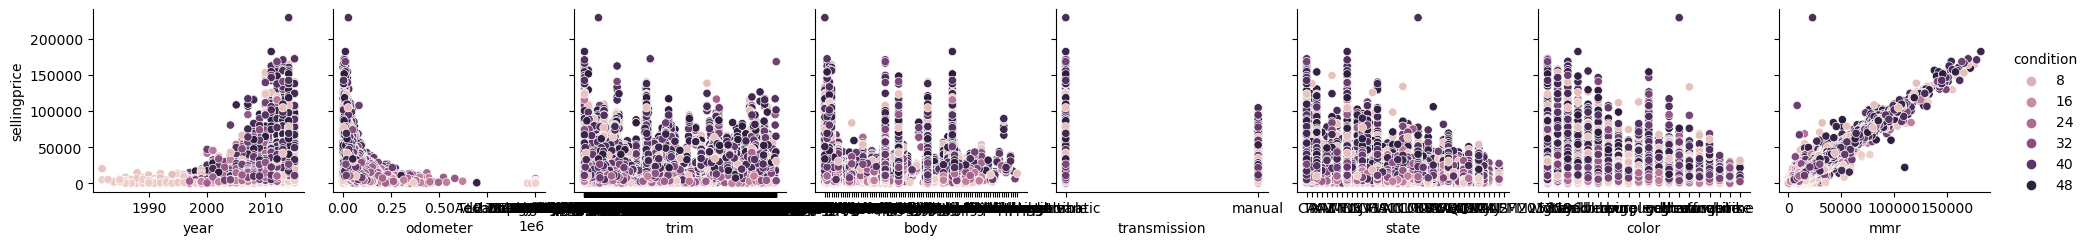

In [6]:
x_vars= ["year", "odometer", "trim", "body", "transmission","state", "color", "mmr"]
y_vars= ["sellingprice"]
g= sns.PairGrid(car_prices_df, hue="condition", x_vars=x_vars, y_vars=y_vars)
g.map_diag(sns.histplot, color=".3")
g.map_offdiag(sns.scatterplot)
g.add_legend();

plt.savefig('./Images/Pair_Grid_condition.png')
plt.show()

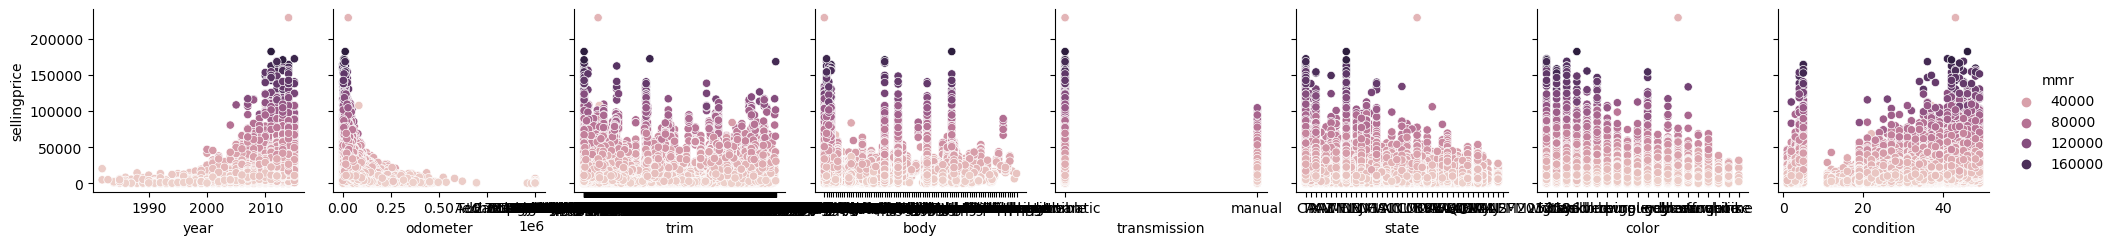

In [7]:
x_vars= ["year", "odometer", "trim", "body", "transmission","state", "color", "condition"]
y_vars= ["sellingprice"]
g= sns.PairGrid(car_prices_df, hue="mmr", x_vars=x_vars, y_vars=y_vars)
g.map_diag(sns.histplot, color=".3")
g.map_offdiag(sns.scatterplot)
g.add_legend();

plt.savefig('./Images/Pair_Grid_mmr.png')
plt.show()

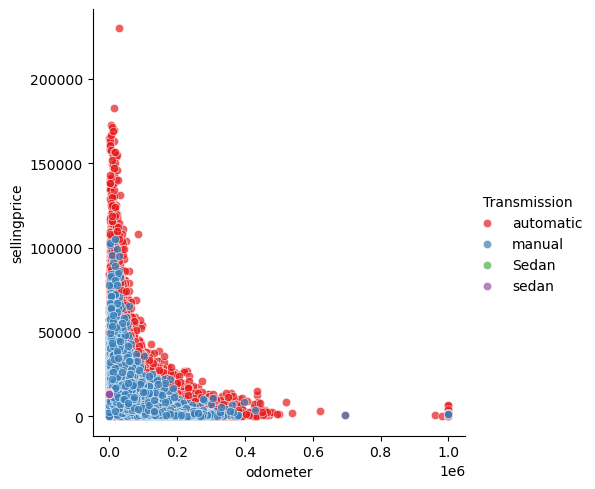

In [8]:
# Create a FacetGrid
g = sns.FacetGrid(car_prices_df, hue="transmission", palette="Set1", height=5)

# Map the scatter plot to the grid
g.map(sns.scatterplot, "odometer", "sellingprice", alpha=.7)

# Add legend with a title
g.add_legend(title='Transmission')

plt.savefig('./Images/facet_grid_transmission.png')
plt.show()

In [9]:
car_prices_df['make'].value_counts()

make
Ford          93554
Chevrolet     60197
Nissan        53946
Toyota        39871
Dodge         30710
              ...  
dodge tk          1
mazda tk          1
hyundai tk        1
ford tk           1
chev truck        1
Name: count, Length: 96, dtype: int64

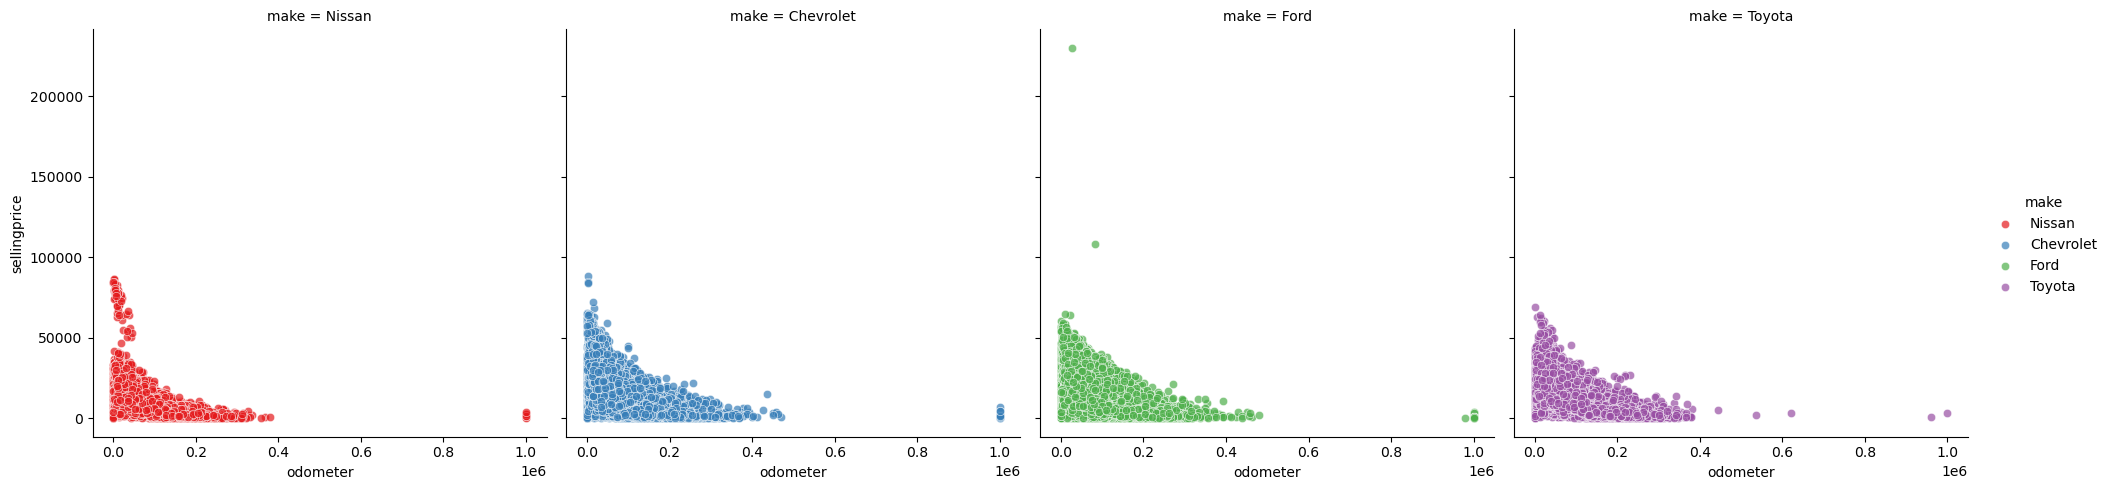

In [10]:

non_luxury_df = car_prices_df[car_prices_df['make'].isin(['Nissan', 'Toyota','Ford', 'Chevrolet'])]

# Create a FacetGrid 
g = sns.FacetGrid(non_luxury_df, col="make", hue="make", palette="Set1", height=5)

# Map the scatter plot to the grid
g.map(sns.scatterplot, "odometer", "sellingprice", alpha=.7)

# Add legend
g.add_legend(title='make')

#plt.savefig('./Images/non_luxury_df.png')
plt.show()

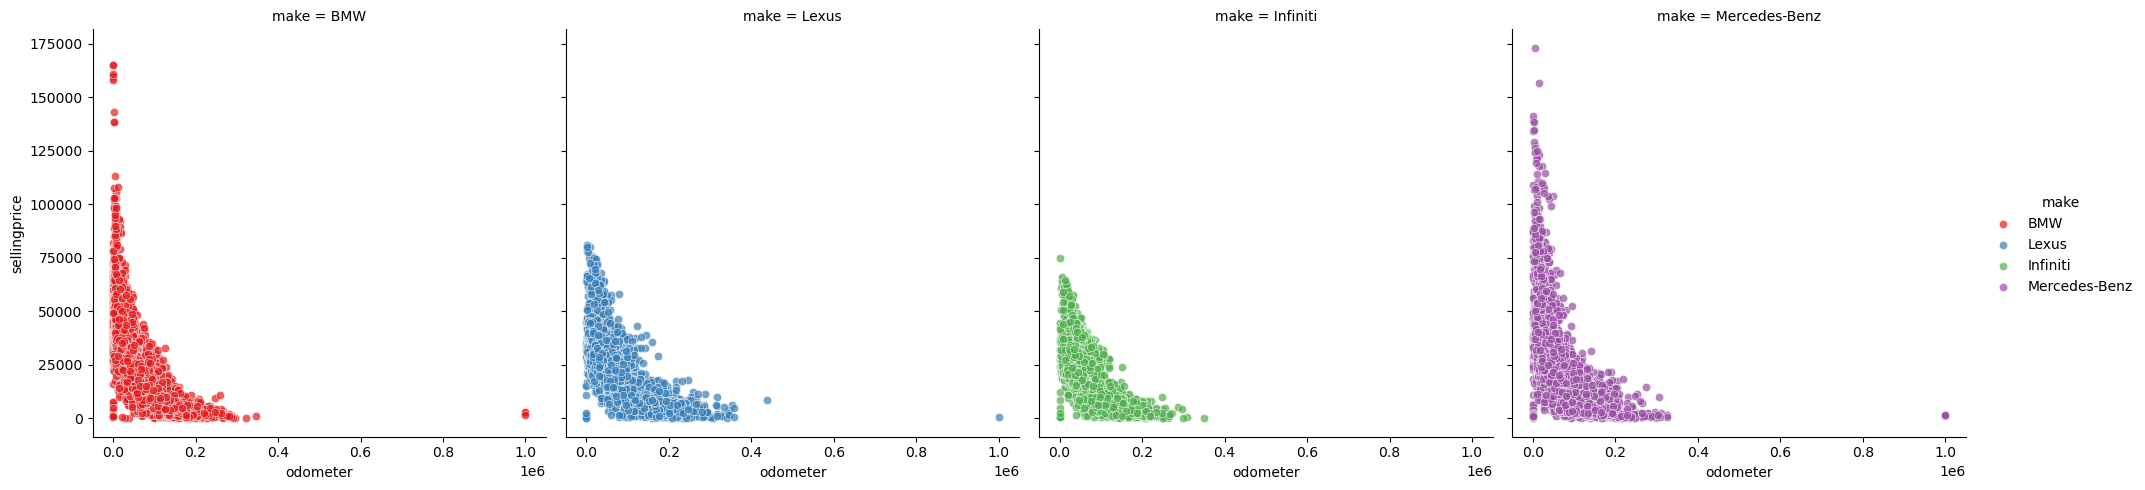

In [11]:

luxury_df = car_prices_df[car_prices_df['make'].isin(['Mercedes-Benz', 'BMW','Lexus', 'Infiniti'])]

# Create a FacetGrid
g = sns.FacetGrid(luxury_df, col="make", hue="make", palette="Set1", height=5)

# Map the scatter plot to the grid
g.map(sns.scatterplot, "odometer", "sellingprice", alpha=.7)

# Add legend
g.add_legend(title='make')

plt.savefig('./Images/luxury_df.png')
plt.show()

### Step3: Preprocessing the Data

In [12]:
# Drop 'vin' and 'seller' columns
car_prices_df = car_prices_df.drop(columns=['vin','seller'], axis=1)

# Drop rows with missing values
car_prices_df.dropna(inplace=True)

# Review the DataFrame
car_prices_df.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,CA,5.0,16639.0,white,black,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,CA,5.0,9393.0,white,beige,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,CA,45.0,1331.0,gray,black,31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,CA,41.0,14282.0,white,black,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,CA,43.0,2641.0,gray,black,66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [55]:
#converts the 'saledate' column to a datetime format and localizes it to UTC
car_prices_df['saledate'] = pd.to_datetime(car_prices_df['saledate'], utc=True)

# Convert to the desired timezone (e.g., 'UTC' or any other timezone)
car_prices_df['saledate'] = car_prices_df['saledate'].dt.tz_convert('UTC')


car_prices_df['year'] = pd.to_datetime(car_prices_df['year'], format='%Y')

# Create a new variable for vehicle age
car_prices_df['vehicle_age'] = pd.to_datetime(car_prices_df['saledate']).dt.year - car_prices_df['year'].dt.year

# Review DataFrame
car_prices_df.head()


,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice,saledate,vehicle_age
0,2015-01-01,Kia,Sorento,LX,SUV,automatic,CA,5.0,16639.0,white,black,20500.0,21500.0,2014-12-16 04:30:00+00:00,-1
1,2015-01-01,Kia,Sorento,LX,SUV,automatic,CA,5.0,9393.0,white,beige,20800.0,21500.0,2014-12-16 04:30:00+00:00,-1
2,2014-01-01,BMW,3 Series,328i SULEV,Sedan,automatic,CA,45.0,1331.0,gray,black,31900.0,30000.0,2015-01-14 20:30:00+00:00,1
3,2015-01-01,Volvo,S60,T5,Sedan,automatic,CA,41.0,14282.0,white,black,27500.0,27750.0,2015-01-28 20:30:00+00:00,0
4,2014-01-01,BMW,6 Series Gran Coupe,650i,Sedan,automatic,CA,43.0,2641.0,gray,black,66000.0,67000.0,2014-12-18 04:30:00+00:00,0


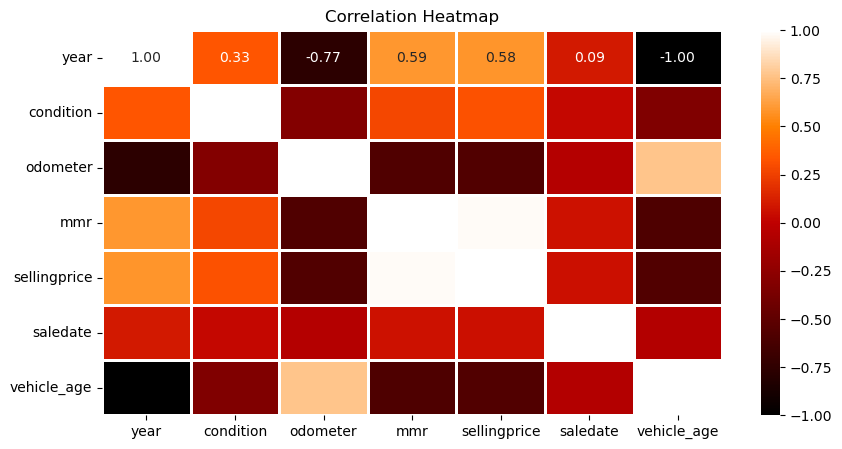

In [14]:

numerical_columns = ['year', 'condition', 'odometer', 'mmr', 'sellingprice', 'saledate', 'vehicle_age']
numerical_df = car_prices_df[numerical_columns]

plt.subplots(figsize=(10,5))
sns.heatmap(numerical_df.corr(), annot=True, fmt='.2f', cmap='gist_heat', linewidths=2, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')


plt.savefig('./Images/Correlation_Heatmap_pp.png')

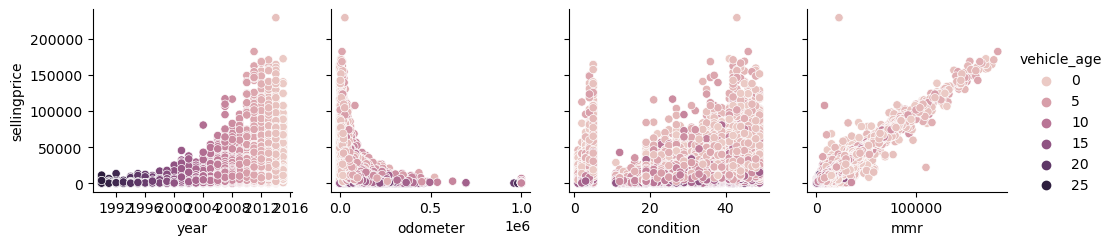

In [56]:
x_vars= ["year", "odometer", "condition", "mmr"]
y_vars= ["sellingprice"]
g= sns.PairGrid(car_prices_df, hue="vehicle_age", x_vars=x_vars, y_vars=y_vars)
g.map_diag(sns.histplot, color=".3")
g.map_offdiag(sns.scatterplot)
g.add_legend();
plt.savefig('./Images/PairGrid_vehicle_age.png')

### Step 4: Encode the variables and create a dataframe for running the models

In [16]:
make_price= car_prices_df.make.value_counts()[:15]
make_price.index
make_df= car_prices_df[car_prices_df['make'].isin(make_price.index)]

In [17]:
make_df=make_df.drop(columns=['saledate','trim', 'interior', 'body', 'transmission'], axis=1)
make_df.head(3)

,year,make,model,state,condition,odometer,color,mmr,sellingprice,vehicle_age
0,2015-01-01,Kia,Sorento,CA,5.0,16639.0,white,20500.0,21500.0,-1
1,2015-01-01,Kia,Sorento,CA,5.0,9393.0,white,20800.0,21500.0,-1
2,2014-01-01,BMW,3 Series,CA,45.0,1331.0,gray,31900.0,30000.0,1


In [18]:
make_df.dropna()

,year,make,model,state,condition,odometer,color,mmr,sellingprice,vehicle_age
0,2015-01-01,Kia,Sorento,CA,5.0,16639.0,white,20500.0,21500.0,-1
1,2015-01-01,Kia,Sorento,CA,5.0,9393.0,white,20800.0,21500.0,-1
2,2014-01-01,BMW,3 Series,CA,45.0,1331.0,gray,31900.0,30000.0,1
4,2014-01-01,BMW,6 Series Gran Coupe,CA,43.0,2641.0,gray,66000.0,67000.0,0
5,2015-01-01,Nissan,Altima,CA,1.0,5554.0,gray,15350.0,10900.0,-1
...,...,...,...,...,...,...,...,...,...,...
558828,2012-01-01,Dodge,Grand Caravan,MA,37.0,97036.0,silver,8300.0,7800.0,3
558831,2011-01-01,BMW,5 Series,FL,39.0,66403.0,white,20300.0,22800.0,4
558834,2012-01-01,BMW,X5,CA,48.0,50561.0,black,29800.0,34000.0,3
558835,2015-01-01,Nissan,Altima,GA,38.0,16658.0,white,15100.0,11100.0,0


In [19]:
make_df.isnull().sum()

year            0
make            0
model           0
state           0
condition       0
odometer        0
color           0
mmr             0
sellingprice    0
vehicle_age     0
dtype: int64

In [20]:
encoder = LabelEncoder()

In [21]:
object_columns = [i for i in make_df.columns if make_df[i].dtype == "object" ]

In [22]:
for  i in object_columns:
    make_df[i] = encoder.fit_transform(make_df[i])
    with open("encoder_"+str(i)+".pkl", 'wb') as encoder_file:
        pickle.dump(encoder, encoder_file)

In [23]:
X= make_df.drop(columns='sellingprice')
y= make_df['sellingprice']

In [24]:
scaler = MinMaxScaler()

In [25]:
for i in X.columns:
    X[i] = scaler.fit_transform(np.array(X[i]).reshape(-1,1))
    with open(str(i)+"_scaler.pkl",'wb') as scaler_file:
        pickle.dump(scaler, scaler_file) 

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=1)
X_train.shape, y_train.shape

((336220, 9), (336220,))

### Step 5: Machine learning

#### Model 1: Lasso Regression

In [27]:
lasso_model = Lasso(alpha=0.1)

In [28]:
lasso_model.fit(X_train,y_train)

Lasso(alpha=0.1)

In [29]:
pred=lasso_model.predict(X_test)

In [30]:
msre = round(np.sqrt(mean_squared_error(y_test,pred)),2)
msre

1627.41

In [31]:
mean_squared_error(y_test,pred)

2648455.8960315343

In [32]:
lasso_model.coef_

array([ 4.56615524e+02, -7.02357106e+01,  4.43835671e+01, -1.66116283e+02,
        1.82657377e+03, -1.18442489e+03,  1.38894060e+02,  1.72841679e+05,
        1.65651803e+03])

In [33]:
lasso_model.intercept_

-1654.232715498998

In [34]:
r2_score(y_test,pred)

0.9662700637428093

In [35]:
param = {'alpha' :[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,40,50,100, 1000, 10000]}

In [36]:
lasso_twocv= GridSearchCV(lasso_model, param, cv=3, n_jobs=1)

In [37]:
lasso_twocv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(alpha=0.1), n_jobs=1,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 40, 50, 100, 1000, 10000]})

In [38]:
pred_two= lasso_twocv.predict(X_test)

In [39]:
mean_absolute_error(y_test, pred_two)

1030.0036412381942

In [40]:
mean_squared_error(y_test, pred_two)

2648308.083676072

In [41]:
r2_score(y_test, pred_two)

0.9662719462364295

In [42]:
lasso_twocv.best_estimator_

Lasso(alpha=0.01)

In [43]:
lass_two = Lasso(alpha=10000)

In [44]:
lass_two.fit(X_train, y_train)

Lasso(alpha=10000)

In [45]:
lass_two.intercept_

13611.683745761704

In [46]:
lass_two.coef_

array([ 0., -0.,  0., -0.,  0., -0.,  0.,  0., -0.])

In [47]:
coef_dict={}
for coef, feat in zip(lasso_model.coef_,X.columns):
    coef_dict[feat] = coef
coef_dict

{'year': 456.61552404562593,
 'make': -70.23571062465278,
 'model': 44.38356706021567,
 'state': -166.11628263648447,
 'condition': 1826.5737732260848,
 'odometer': -1184.4248910220813,
 'color': 138.89406046946715,
 'mmr': 172841.6791931605,
 'vehicle_age': 1656.5180336376832}

In [48]:
predict_lasso = lass_two.predict(X_test)

In [49]:
coef_names = make_df.drop('sellingprice',axis=1).columns

print(coef_names)

Index(['year', 'make', 'model', 'state', 'condition', 'odometer', 'color',
       'mmr', 'vehicle_age'],
      dtype='object')


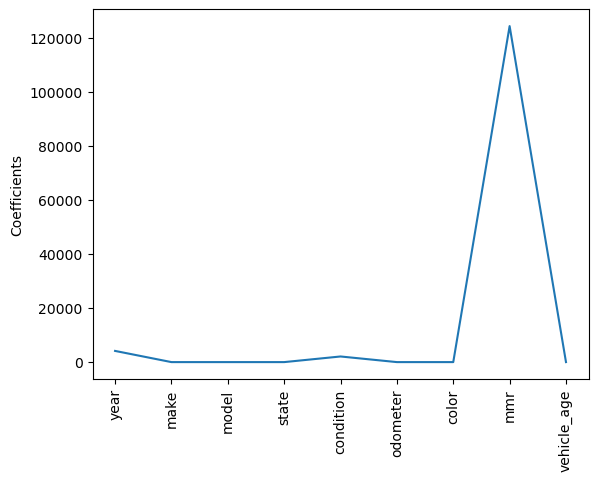

In [50]:
lasso = Lasso(alpha=100)
lasso_coef = lasso.fit(X, y).coef_

plt.plot(range(len(coef_names)), lasso_coef)
plt.xticks(range(len(coef_names)), coef_names, rotation=90)
plt.ylabel("Coefficients")
plt.show()

#### Model 2: Linear Regression

In [51]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_pred = linreg.predict(X_test)

In [52]:
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_r2 = r2_score(y_test, linreg_pred)
print("Mean Absolute Error of linear regression model is:", linreg_mae)
print("R2 score of linear regression model is:", linreg_r2)

Mean Absolute Error of linear regression model is: 1030.003265618789
R2 score of linear regression model is: 0.966272087314783


In [53]:
linreg_score = cross_val_score(linreg, X_test, y_test, cv=4)

#### Model 3: Principal Component Analysis

In [58]:
make_df.dtypes

year            datetime64[ns]
make                     int64
model                    int64
state                    int64
condition              float64
odometer               float64
color                    int64
mmr                    float64
sellingprice           float64
vehicle_age              int32
dtype: object

In [59]:
make_df=make_df.drop(columns=['year'], axis=1)


In [62]:
make_df.columns

Index(['make', 'model', 'state', 'condition', 'odometer', 'color', 'mmr',
       'sellingprice', 'vehicle_age'],
      dtype='object')

In [60]:
pca_df_scaled = StandardScaler().fit_transform(make_df)

In [63]:
# Create a DataFrame called with the scaled data
# The column names should match those referenced in the StandardScaler step
pca_default_df = pd.DataFrame(
    pca_df_scaled,
    columns=['make','model', 'state', 'condition',
 'odometer','color','mmr','sellingprice','vehicle_age'])

pca_default_df.head()

,make,model,state,condition,odometer,color,mmr,sellingprice,vehicle_age
0,0.634551,1.467972,-1.119352,-1.954425,-0.940274,1.124326,0.764127,0.884557,-1.482997
1,0.634551,1.467972,-1.119352,-1.954425,-1.081441,1.124326,0.798119,0.884557,-1.482997
2,-1.428424,-1.525332,-1.119352,1.058304,-1.238505,-0.377999,2.055824,1.837104,-0.941165
3,-1.428424,-1.379526,-1.119352,0.907668,-1.212983,-0.377999,5.919583,5.983486,-1.212081
4,1.322210,-1.293758,-1.119352,-2.255698,-1.156232,-0.377999,0.180598,-0.303326,-1.482997


In [68]:
pca = PCA(n_components=9)

In [69]:
pca_df = pca.fit_transform(make_df)

pca_df[:5]

array([[-4.92616072e+04,  3.13876566e+03,  7.85106096e+02,
        -1.74526022e+02,  3.30626754e+01, -7.89807024e+00,
        -7.79156339e+00,  2.60922816e+00,  3.34384326e+00],
       [-5.64598790e+04,  2.27990235e+03,  5.80774111e+02,
        -1.75774869e+02,  3.29765292e+01, -7.93466307e+00,
        -7.78266718e+00,  2.55982907e+00,  2.96114234e+00],
       [-6.64745641e+04,  1.47839684e+04, -1.36972830e+03,
         1.81324540e+02, -7.62995886e+00, -1.21860756e+01,
         2.33191475e+00, -6.05513706e+00, -1.39381140e+00],
       [-7.25807436e+04,  6.47206621e+04,  2.32494567e+02,
         1.96374326e+02,  7.85121144e+00, -9.89751892e+00,
         2.18277032e+00, -4.05731686e+00, -2.62265918e+00],
       [-5.85862247e+04, -9.54313794e+03, -2.95463482e+03,
         1.39419547e+02,  2.67192991e+01, -8.85007033e+00,
         1.57220590e+00,  5.80459578e+00,  3.23128746e+00]])

In [77]:
evr= pca.explained_variance_ratio_

In [80]:
# Convert to percentage
explained_variance_percentage = evr * 100

In [72]:
pca_df = pd.DataFrame(
    pca_df,
    columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6',
            'PCA7', 'PCA8', 'PCA9'])

pca_df.head()

 
    

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,-49261.607188,3138.765660,785.106096,-174.526022,33.062675,-7.898070,-7.791563,2.609228,3.343843
1,-56459.878963,2279.902350,580.774111,-175.774869,32.976529,-7.934663,-7.782667,2.559829,2.961142
2,-66474.564145,14783.968433,-1369.728304,181.324540,-7.629959,-12.186076,2.331915,-6.055137,-1.393811
3,-72580.743594,64720.662071,232.494567,196.374326,7.851211,-9.897519,2.182770,-4.057317,-2.622659
4,-58586.224714,-9543.137945,-2954.634819,139.419547,26.719299,-8.850070,1.572206,5.804596,3.231287


In [73]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

# Append the value of the computed inertia from the `inertia_` attribute of teh KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(pca_df)
    inertia.append(k_model.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,1.104482e+15
1,2,3.839332e+14
2,3,2.348725e+14
3,4,1.715011e+14
4,5,1.368627e+14


In [74]:
# Plot the Elbow Curve
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)